## **SVM - MNIST**

**Procesamiento:**
- Descarga de datos 
- División de datos 
- Normalización para reducir la escala de los datos

In [3]:
from sklearn import preprocessing 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame = False)
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

scaler = preprocessing.MinMaxScaler()
X_test_normalizado=scaler.fit_transform(X_test)
X_train_normalizado =scaler.fit_transform(X_train)

### **Primer intento**

C:\Users\maria\AppData\Local\Temp\ipykernel_14256\3153139226.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.
  matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")


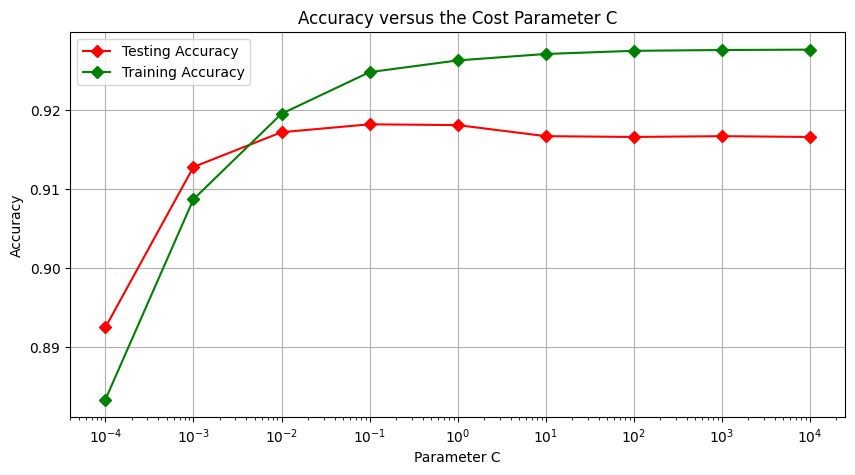

[0.8925, 0.9128, 0.9172, 0.9182, 0.9181, 0.9167, 0.9166, 0.9167, 0.9166]


In [4]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

acc = []
acc_tr = []
coefficient = []
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    svm = LinearSVC(dual=False, C=c)
    svm.fit(X_train_normalizado, y_train)
    coef = svm.coef_
    
    p_tr = svm.predict(X_train_normalizado)
    a_tr = accuracy_score(y_train, p_tr)
    
    pred = svm.predict(X_test_normalizado)
    a = accuracy_score(y_test, pred)
    
    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)
import matplotlib.pyplot as matplot
c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")
matplot.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
matplot.grid(True)
matplot.xlabel("Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C')
matplot.show()

print(acc)

### **Segundo intento**

C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\maria\AppData\Local\Temp\ipykernel_14256\59819767.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.
  matplot.semilogx(c, acc2,'-gD' ,color='red' , label="Testing Accuracy")


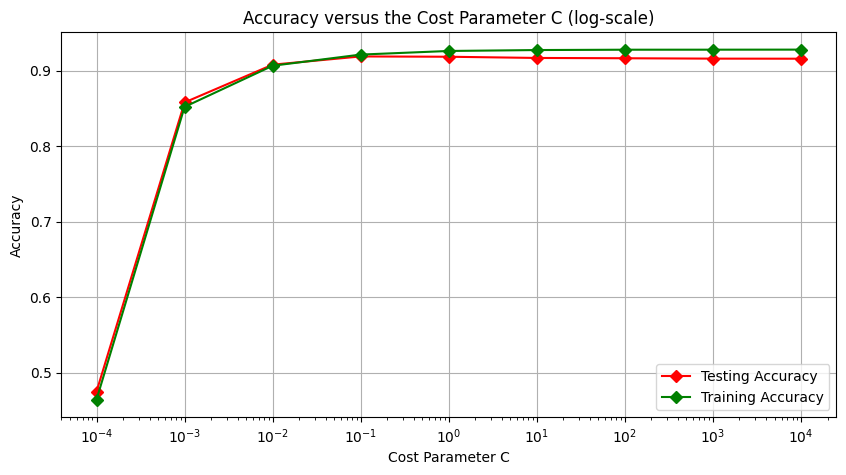

[0.475, 0.858, 0.908, 0.9189, 0.9185, 0.9169, 0.9165, 0.916, 0.9159]


In [5]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as matplot

acc2 = []
acc_tr2 = []
coefficient2 = []
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    svm = LinearSVC(dual=False, C=c, penalty='l1')
    svm.fit(X_train_normalizado, y_train)
    coef = svm.coef_
    
    p_tr = svm.predict(X_train_normalizado)
    a_tr = accuracy_score(y_train, p_tr)
    
    pred = svm.predict(X_test_normalizado)
    a = accuracy_score(y_test, pred)
    
    coefficient2.append(coef)
    acc_tr2.append(a_tr)
    acc2.append(a)

c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc2,'-gD' ,color='red' , label="Testing Accuracy")
matplot.semilogx(c, acc_tr2,'-gD' , label="Training Accuracy")
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

print(acc2)

### **Tercer intento**

In [6]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

acc3 = []
acc_tr3 = []
coefficient3 = []
for c in [0.01,0.1,1,10,100]:
    svm = SVC(kernel='poly', C=c)
    model = svm.fit(X_train_normalizado, y_train)
    d_coef = svm.dual_coef_
    
    p_tr = svm.predict(X_train_normalizado)
    a_tr = accuracy_score(y_train, p_tr)
        
    pred = svm.predict(X_test_normalizado)
    a = accuracy_score(y_test, pred)
    
    coefficient3.append(d_coef)
    acc_tr3.append(a_tr)
    acc3.append(a)

import matplotlib.pyplot as matplot
c = [0.01,0.1,1,10,100]
matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc3,'-gD' ,color='red' , label="Testing Accuracy")
matplot.semilogx(c, acc_tr3,'-gD' , label="Training Accuracy")
matplot.grid(True)
matplot.xlabel("Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (poly)')
matplot.show()

print(acc3)

C:\Users\maria\AppData\Local\Temp\ipykernel_14256\1717507803.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.
  matplot.semilogx(c, acc3,'-gD' ,color='red' , label="Testing Accuracy")


[0.8958, 0.9572, 0.9771, 0.9786, 0.9788]


In [13]:
acc_tr3

[0.8879, 0.9608833333333333, 0.9916166666666667, 0.9997, 1.0]

In [ ]:
acc4 = []
acc_tr4 = []
coefficient4 = []
for d in [2, 3, 4, 5]:
    svm = SVC(kernel='poly', C=1, degree=d)
    model = svm.fit(X_train_normalizado, y_train)
    d_coef = svm.dual_coef_
    
    p_tr = svm.predict(X_train_normalizado)
    a_tr = accuracy_score(y_train, p_tr)
        
    pred = svm.predict(X_test_normalizado)
    a = accuracy_score(y_test, pred)
    
    coefficient4.append(d_coef)
    acc_tr4.append(a_tr)
    acc4.append(a)

import matplotlib.pyplot as matplot
d = [2, 3, 4, 5]


C:\Users\maria\AppData\Local\Temp\ipykernel_14256\654867371.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.
  matplot.semilogx(d, acc4,'-gD' ,color='red' , label="Testing Accuracy")


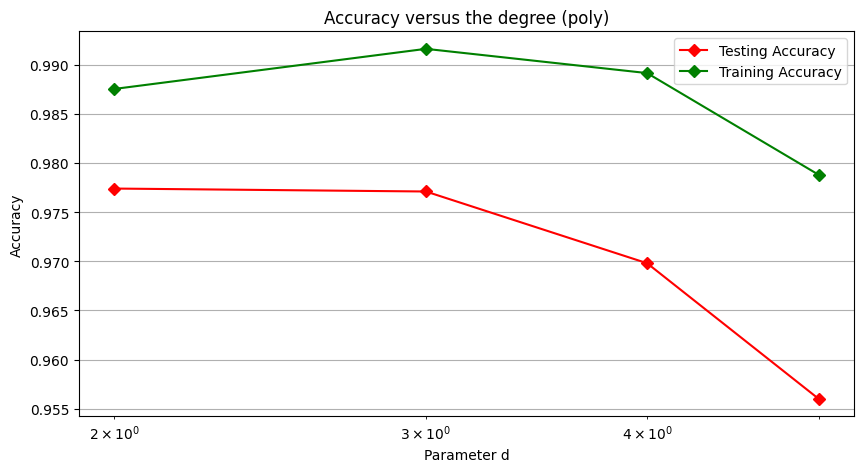

[0.9774, 0.9771, 0.9698, 0.956]


In [12]:
matplot.subplots(figsize=(10, 5))
matplot.semilogx(d, acc4,'-gD' ,color='red' , label="Testing Accuracy")
matplot.semilogx(d, acc_tr4,'-gD' , label="Training Accuracy")
matplot.grid(True)
matplot.xlabel("Parameter d")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the degree (poly)')
matplot.show()

print(acc4)

### **Validación del mejor modelo**

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm1 = SVC(kernel='poly', C=1, degree=2)
model = svm1.fit(X_train_normalizado, y_train)

p_tr = svm1.predict(X_train_normalizado)
a_tr = accuracy_score(y_train, p_tr)
    
pred = svm1.predict(X_test_normalizado)
a = accuracy_score(y_test, pred)

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm1, X_train_normalizado, y_train, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())

print(a)
print(a_tr)

Cross-validation accuracy scores: [0.97541667 0.97358333 0.97408333 0.97116667 0.97658333]
Average cross-validation accuracy: 0.9741666666666667
0.9774
0.9875333333333334


### Tenemos que los mejores resultados fueron:

- 91.81% de accuracy en un Linear SVC con c = 1
- 91.85% de accuracy en un Linear SVC con c = 1 y penalización L1
- 97.74% de accuracy en poly SVC con c = 1 y degree de 2